# Explorative Datenanalyse mit Python – Eine Fallstudie

*Analyse der Antworten aus der jährlichen Entwicklerumfrage 2020 von Stack Overflow*

Dieses Tutorial ist das achte (und letzte) in einer Reihe zur Einführung in die Programmierung und Datenanalyse mit der Python-Programmiersprache. Diese Tutorials basieren auf einem praktischen, programmbasierten Ansatz. Der beste Weg, das Material zu erlernen, besteht darin, den Code auszuführen und mit den Beispielen zu experimentieren.

Die folgenden Themen werden in diesem Tutorial behandelt:

* [Datenvorbereitung und -aufbereitung](#datenvorbereitung)
* [Explorative Analyse und Visualisierung](#visualisierung)
* [Fragen stellen und beantworten](#fragen)
* [Schlussfolgerungen und Ergebnisse](#ergebnisse)

## Einführung

Für unsere Analyse verwenden wir den StackOverflow-Entwicklerumfragedatensatz. Dies ist eine jährliche Umfrage, die von StackOverflow durchgeführt wird. Die Rohdaten und Ergebnisse finden Sie [hier](https://insights.stackoverflow.com/survey).

Es gibt mehrere Möglichkeiten, den Datensatz in Jupyter zu importieren:

- Laden Sie die CSV-Datei manuell herunter und laden Sie sie über die Jupyter-GUI hoch
- Verwenden Sie die Funktion „urlretrieve“ aus `urllib.request`, um CSV-Dateien direkt von einer Roh-URL herunterzuladen

Wir nutzen die bereits heruntergeladene Datei, die sich im `data` Ordner befindet.

In [1]:
import os

In [4]:
os.listdir('data/stack-overflow-developer-survey-2020')

['README_2020.txt',
 'so_survey_2020.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

Sie können die heruntergeladenen Dateien mit der Menüoption `Datei > Öffnen` in Jupyter durchsuchen. Es scheint, als ob der Datensatz drei Dateien enthält:

- `README.txt` – enthält Informationen zum Datensatz
- `survey_results_schema.csv` – enthält die Liste der Fragen (und Kurzcodes für jede Frage)
- `survey_results_public.csv` – die vollständige Liste der Antworten auf die Fragen

Laden wir die CSV-Dateien mithilfe der Pandas-Bibliothek. Wir verwenden den Namen `survey_raw_df` für das Data Frame, um anzuzeigen, dass es sich um unverarbeitete Daten handelt, die wir möglicherweise bereinigen, filtern und ändern, um ein Data Frame vorzubereiten, der für die Analyse bereit ist.

In [3]:
import pandas as pd

In [4]:
survey_raw_df = pd.read_csv('data/stack-overflow-developer-survey-2020/survey_results_public.csv')

In [5]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


Der Datensatz enthält über 64.000 Antworten auf 60 Fragen (obwohl viele Fragen optional sind). Die Antworten wurden anonymisiert und es stehen uns keine personenbezogenen Daten zur Verfügung – obwohl jedem Befragten eine zufällige Befragten-ID zugewiesen wurde.

Sehen wir uns die Liste der Spalten im Data Frame an.

In [6]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

Es scheint, dass Kurzcodes für Fragen als Spaltennamen verwendet werden.

Wir können auf die Schemadatei verweisen, um den vollständigen Text jeder Frage anzuzeigen. Die Schemadatei enthält nur zwei Spalten: `Column` und `QuestionText`, sodass wir sie als Pandas-Serie mit `Column` als Index und `QuestionText` als Wert laden können.

In [7]:
schema_fname = 'data/stack-overflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [8]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

Wir können jetzt `schema_raw` verwenden, um den vollständigen Fragentext für jede Spalte in `survey_raw_df` abzurufen.

In [9]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

Wir haben den Datensatz nun geladen und können mit dem nächsten Schritt der Vorverarbeitung und Bereinigung der Daten für unsere Analyse fortfahren.

<a id='datenvorbereitung'></a>

## Datenvorbereitung und -aufbereitung

Obwohl die Umfrageantworten eine Fülle von Informationen enthalten, beschränken wir unsere Analyse auf die folgenden Bereiche:

- Demografische Daten der Umfrageteilnehmer und der globalen Programmiergemeinschaft
- Verteilung von Programmierkenntnissen, Erfahrungen und Vorlieben
- Beschäftigungsbezogene Informationen, Vorlieben und Meinungen

Wählen wir eine Teilmenge von Spalten mit den relevanten Daten für unsere Analyse aus.

In [10]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [11]:
len(selected_columns)

20

Extrahieren wir eine Kopie der Daten aus diesen Spalten in einem neuen Data Frame `survey_df`, das wir weiter ändern können, ohne das ursprüngliche Data Frame zu beeinträchtigen.

In [12]:
survey_df = survey_raw_df[selected_columns].copy()

In [13]:
schema = schema_raw[selected_columns]

In [14]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [16]:
schema.shape

(20,)

Sehen wir uns einige grundlegende Informationen zum Data Frame an.

In [17]:
survey_df.shape

(64461, 20)

In [18]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Die meisten Spalten haben den Datentyp `Objekt`, entweder weil sie Werte unterschiedlichen Typs enthalten, oder weil sie leere Werte enthalten, die mit `NaN` dargestellt werden. Es scheint, dass jede Spalte einige leere Werte enthält, da die Nicht-Null-Anzahl für jede Spalte niedriger ist als die Gesamtzahl der Zeilen (64461). Wir müssen mit leeren Werten umgehen und den Datentyp für jede Spalte von Fall zu Fall manuell anpassen.

Nur zwei der Spalten wurden als numerische Spalten (`Age` und `WorkWeekHrs`) erkannt, obwohl es einige andere Spalten gibt, die überwiegend numerische Werte enthalten. Um unsere Analyse zu vereinfachen, konvertieren wir einige andere Spalten in numerische Datentypen und ignorieren dabei alle nicht numerischen Werte (sie werden in NaNs konvertiert).

In [19]:
survey_df.Age1stCode

0         13
1         19
2         15
3         18
4         16
        ... 
64456     16
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Age1stCode, Length: 64461, dtype: object

In [20]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [21]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Sehen wir uns nun einige grundlegende Statistiken zu den numerischen Spalten an.

In [22]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Es scheint ein Problem mit der Altersspalte zu geben, da der Mindestwert 1 und der Höchstwert 279 beträgt. Dies ist ein häufiges Problem bei Umfragen: Antworten können aufgrund versehentlicher oder absichtlicher Fehler bei der Beantwortung ungültige Werte enthalten. Eine einfache Lösung besteht darin, die Zeilen, in denen der Wert in der Altersspalte höher als 100 Jahre oder niedriger als 10 Jahre ist, als ungültige Umfrageantworten zu ignorieren. Dies kann mit der `.drop`-Methode erfolgen, [wie hier erklärt](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

In [23]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

Das Gleiche gilt für `WorkWeekHrs`. Ignorieren wir Einträge, bei denen der Wert für die Spalte höher als 140 Stunden ist. (~20 Stunden pro Tag).

In [24]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In der Spalte `Gender` können auch mehrere Optionen ausgewählt werden. Um unsere Analyse zu vereinfachen, entfernen wir jedoch Werte, die mehr als eine Option enthalten.

In [25]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [26]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [27]:
import numpy as np

In [28]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

Wir haben den Datensatz nun bereinigt und für die Analyse vorbereitet. Werfen wir einen Blick auf beispielhafte Zeilen aus dem Data Frame.

In [29]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
10740,South Africa,NaN,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,30.0,22.0,C#;HTML/CSS;Java;JavaScript;SQL;VBA,C#;HTML/CSS;Java;JavaScript;SQL,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data or business analyst;Data scientist or mac...,NaN,NaN,NaN,NaN,Very important
26701,Italy,33.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,8.0,20.0,13.0,C#;C++;HTML/CSS;Java;JavaScript;PHP;Python;SQL...,C++;Java;Scala,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Somewhat important
20360,Australia,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,12.0,3.0,HTML/CSS;JavaScript;PHP;Python,Go;R;TypeScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, embedded applications or devices;De...",40.0,Slightly satisfied,Remote work options;Office environment or comp...,Occasionally: 1-2 days per quarter but less th...,Fairly important
32114,Italy,25.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,15.0,5.0,3.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,PHP;SQL,Once a decade,Call a coworker or friend;Visit Stack Overflow,Employed full-time,Academic researcher;Database administrator;Dev...,8.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Critically important
45794,India,22.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,17.0,5.0,2.0,HTML/CSS;JavaScript;PHP;SQL;VBA,NaN,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Designer;Developer, back-end;Developer, front-...",8.0,Very satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Very important
50253,Turkey,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,3.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, full-stack;Deve...",40.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
20655,India,24.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,16.0,9.0,4.0,C#;HTML/CSS;JavaScript;Python;TypeScript,Python,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data or business analyst;Data scientist or mac...,45.0,Slightly dissatisfied,Diversity of the company or organization;Langu...,Often: 1-2 days per week or more,Not at all important/not necessary
10763,United Kingdom,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,14.0,10.0,4.0,Bash/Shell/PowerShell;C++;Python,Bash/Shell/PowerShell;C++;Go;Python,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,DevOps specialist,40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Fairly important
46338,Norway,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,7.0,3.0,C#;HTML/CSS;JavaScript;SQL,C#;HTML/CSS;JavaScript;TypeScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed

<a id='visualisierung'></a>

## Explorative Analyse und Visualisierung

Bevor wir interessante Fragen zu den Umfrageantworten stellen können, wäre es hilfreich zu verstehen, wie die demografischen Merkmale, d. h. Land, Alter, Geschlecht, Bildungsniveau, Beschäftigungsniveau usw., der Befragten aussehen. Es ist wichtig, diese Variablen zu untersuchen, um zu verstehen, wie repräsentativ die Umfrage für die weltweite Programmiergemeinschaft ist, da eine Umfrage dieser Größenordnung im Allgemeinen zu einem gewissen [selection bias](https://en.wikipedia.org/wiki/Selection_bias) führt.

Beginnen wir mit dem Import von `matplotlib.pyplot` and `seaborn`.

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Land

Schauen wir uns die Anzahl der Länder an, aus denen in der Umfrage Antworten vorliegen, und zeichnen wir die 10 Länder mit der höchsten Anzahl an Antworten auf.

In [31]:
schema.Country

'Where do you live?'

In [32]:
survey_df.Country.nunique()

183

Mit der Methode `value_counts` können wir die Länder mit der höchsten Anzahl an Befragten identifizieren.

In [33]:
survey_df.Country.value_counts()

United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Nauru                      1
Lesotho                    1
Saint Lucia                1
Antigua and Barbuda        1
Marshall Islands           1
Name: Country, Length: 183, dtype: int64

In [34]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

Wir können diese Informationen mithilfe eines Balkendiagramms visualisieren.

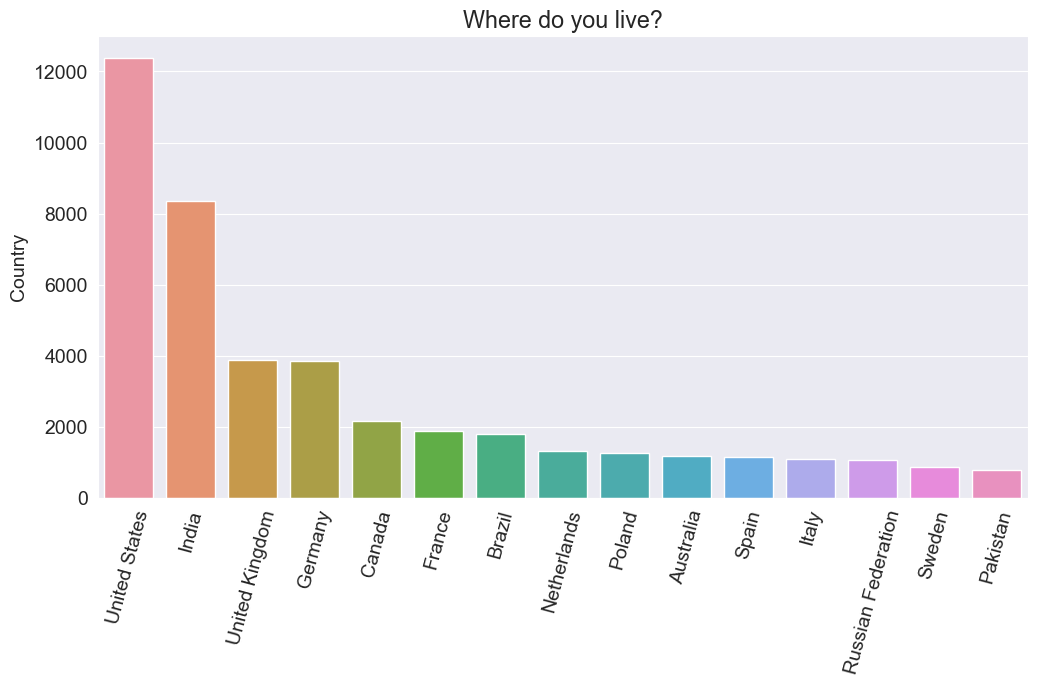

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

Es scheint, dass überproportional viele Befragte aus den USA und Indien stammen – was zu erwarten ist, da diese Länder (abgesehen von China) die höchste Bevölkerungszahl haben und die Umfrage auf Englisch erfolgt, der von Fachleuten in China allgemein verwendeten Sprache USA, Indien und Großbritannien. Wir können bereits erkennen, dass die Umfrage möglicherweise nicht repräsentativ für die gesamte Programmiergemeinschaft ist – insbesondere für nicht englischsprachige Länder.

**Übung**:
Versuchen Sie, den Prozentsatz der Antworten aus englischsprachigen im Vergleich zu nicht englischsprachigen Ländern zu ermitteln. Sie können [diese Liste der in verschiedenen Ländern gesprochenen Sprachen](https://github.com/JovianML/opendatasets/blob/master/data/countries-linguals-spoken/countries-linguals.csv) verwenden.

### Alter

Die Verteilung des Alters der Befragten ist ein weiterer wichtiger zu betrachtender Faktor, den wir mithilfe eines Histogramms visualisieren können.

In [36]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

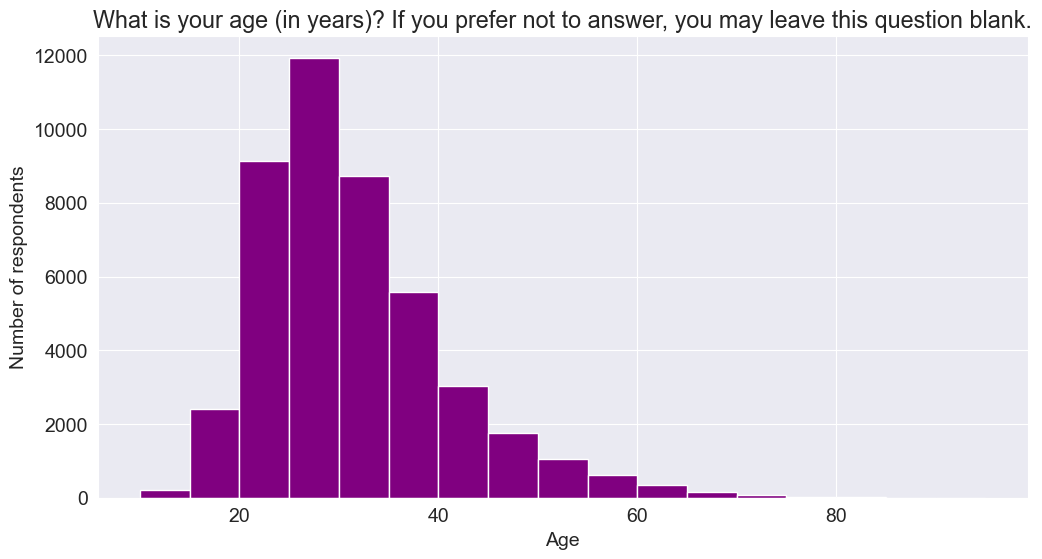

In [37]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,100,5), color='purple');

Es scheint, dass ein großer Prozentsatz der Befragten im Alter zwischen 20 und 45 Jahren ist, was einigermaßen repräsentativ für die Programmiergemeinschaft im Allgemeinen ist, da viele junge Menschen in den letzten 20 Jahren Computer als Studienfach oder Beruf gewählt haben.

**Übung**: Möglicherweise möchten Sie die Antworten nach Alter (oder Altersgruppe) herausfiltern, wenn Sie die Ergebnisse der Umfrage für verschiedene Altersgruppen analysieren und vergleichen möchten. Erstellen Sie eine neue Spalte mit dem Namen `AgeGroup`, die Werte wie `Less than 10 years`, `10-18 years`, `18-30 years`, `30-45 years`, `45-60 years`, `Older than 60 years` und wiederholen Sie die Analyse im Rest dieses Notizbuchs für jede Altersgruppe.

### Geschlecht

Schauen wir uns die Verteilung der Antworten für das Geschlecht an. Es ist eine bekannte Tatsache, dass Frauen und nicht-binäre Geschlechter in der Programmiergemeinschaft unterrepräsentiert sind, sodass wir hier mit einer ungleichen Verteilung rechnen können.

In [38]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [39]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

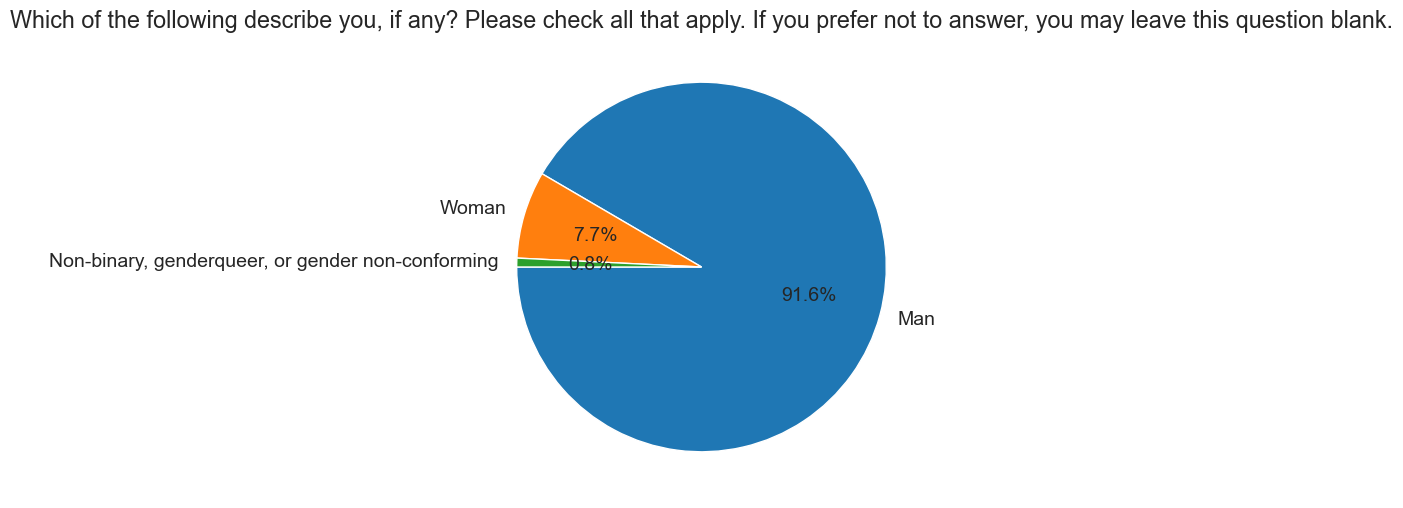

In [40]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [41]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

Ein Kreisdiagramm wäre eine gute Möglichkeit, die Verteilung zu visualisieren.

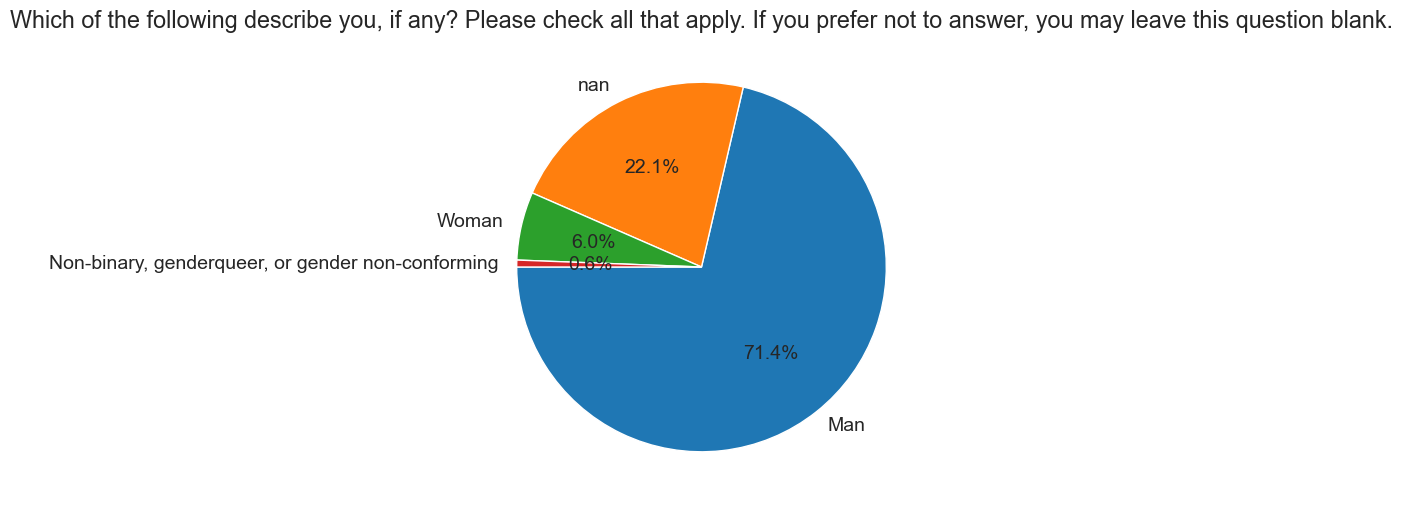

In [42]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Nur etwa 8 % der Umfrageteilnehmer, die die Frage beantwortet haben, identifizieren sich als Frauen oder nicht-binär. Diese Zahl ist niedriger als der Gesamtanteil von Frauen und nicht-binären Geschlechtern in der Programmiergemeinschaft, der auf etwa 12 % geschätzt wird.

**Übung**: Es wäre interessant, die Antworten und Präferenzen der Umfrage nach Geschlechtern zu vergleichen. Wir empfehlen Ihnen, diese Analyse mit diesen Aufschlüsselungen zu wiederholen. Wie unterscheiden sich die relativen Bildungsniveaus zwischen den Geschlechtern? Wie unterscheiden sich die Gehälter? Sie finden diese Analyse möglicherweise auf der Website [Gender Divide in Data Science](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) nützlich.

### Bildungsniveau

Eine formale Ausbildung in Informatik wird oft als wichtige Voraussetzung für die Karriere als Programmierer angesehen. Mal sehen, ob dies tatsächlich der Fall ist, insbesondere da online viele kostenlose Ressourcen und Tutorials zum Erlernen des Programmierens verfügbar sind. Wir verwenden ein horizontales Balkendiagramm, um das Bildungsniveau der Befragten zu vergleichen.

In [43]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

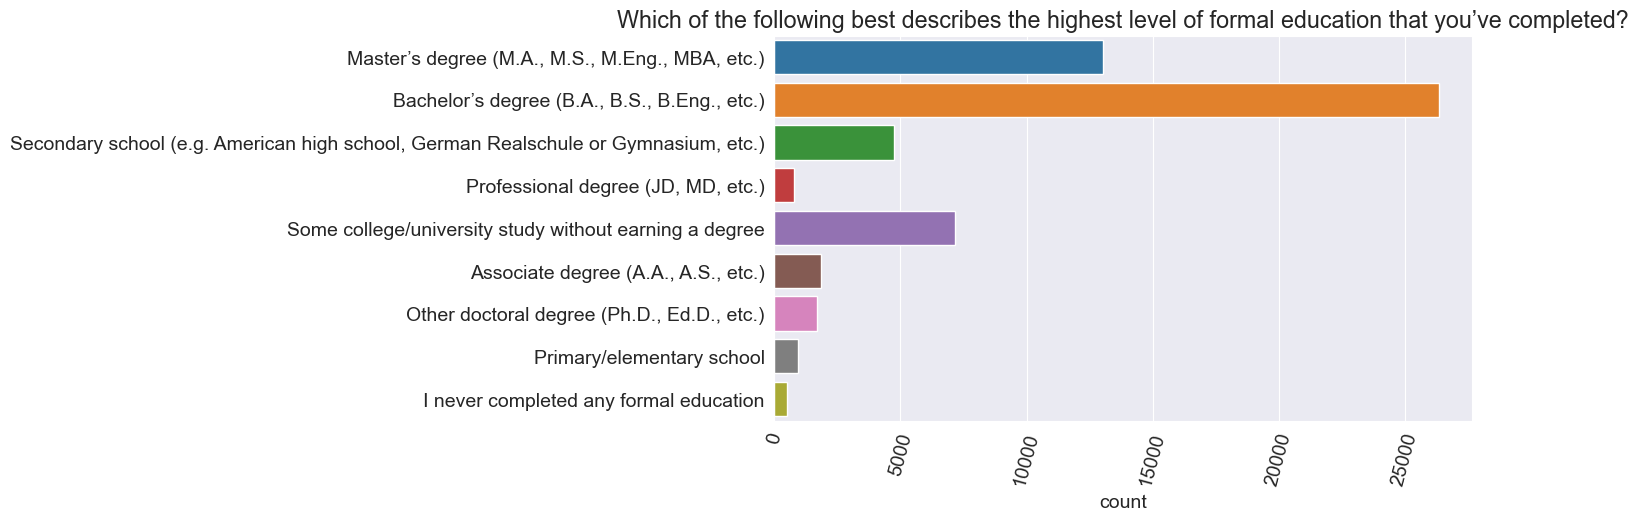

In [44]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Es scheint, dass deutlich mehr als die Hälfte der Befragten einen Bachelor- oder Master-Abschluss haben, die meisten Programmierer scheinen also definitiv über eine Hochschulausbildung zu verfügen, obwohl aus dieser Grafik allein nicht klar hervorgeht, ob sie einen Abschluss in Informatik haben.

**Übungen**: Das Diagramm zeigt derzeit die Anzahl der Befragten für jede Option. Können Sie es ändern, um stattdessen den Prozentsatz anzuzeigen? Können Sie die Grafik außerdem aufschlüsseln, um die Prozentsätze für jeden Grad für Männer und Frauen zu vergleichen?

Lassen Sie uns auch die Bachelor-Studiengänge grafisch darstellen, aber dieses Mal werden wir die Zahlen in Prozentsätze umwandeln und nach Prozentwerten sortieren, um die Reihenfolge besser visualisieren zu können.

In [45]:
schema.UndergradMajor

'What was your primary field of study?'

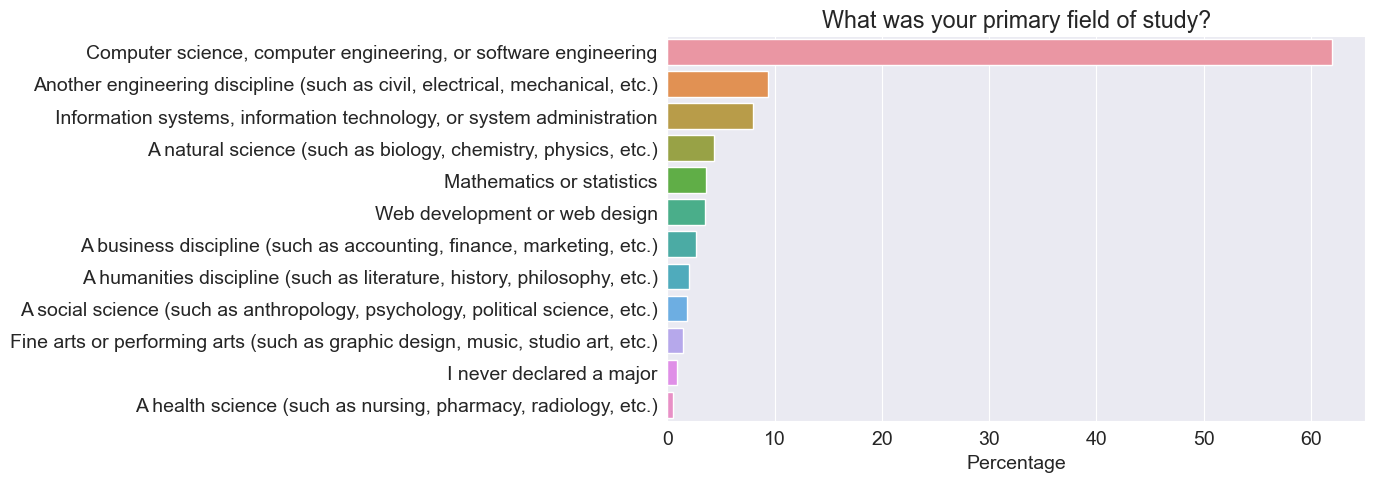

In [46]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

Es stellt sich heraus, dass 40 % der Programmierer mit Hochschulabschluss ein anderes Studienfach als Informatik haben – was sehr ermutigend ist. Dies scheint darauf hinzudeuten, dass eine Hochschulausbildung zwar im Allgemeinen hilfreich ist, Sie jedoch kein Hauptfach in Informatik absolvieren müssen, um ein erfolgreicher Programmierer zu werden.

**Übungen**: Analysieren Sie die Ergebnisse der Spalte `NEWEdImpt` für Befragte mit einem Hochschulabschluss im Vergleich zu denen ohne Hochschulabschluss. Bemerken Sie einen Meinungsunterschied?

In [47]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

### Arbeitsverhältnis

Programmierer entscheiden sich häufig für freiberufliche Arbeit oder Vertragsarbeit, daher wäre es interessant, die Aufteilung zwischen Vollzeit-, Teilzeit- und freiberuflicher Arbeit zu vergleichen. Lassen Sie uns die Daten aus der Spalte `Employment` visualisieren.

In [48]:
schema.Employment

'Which of the following best describes your current employment status?'

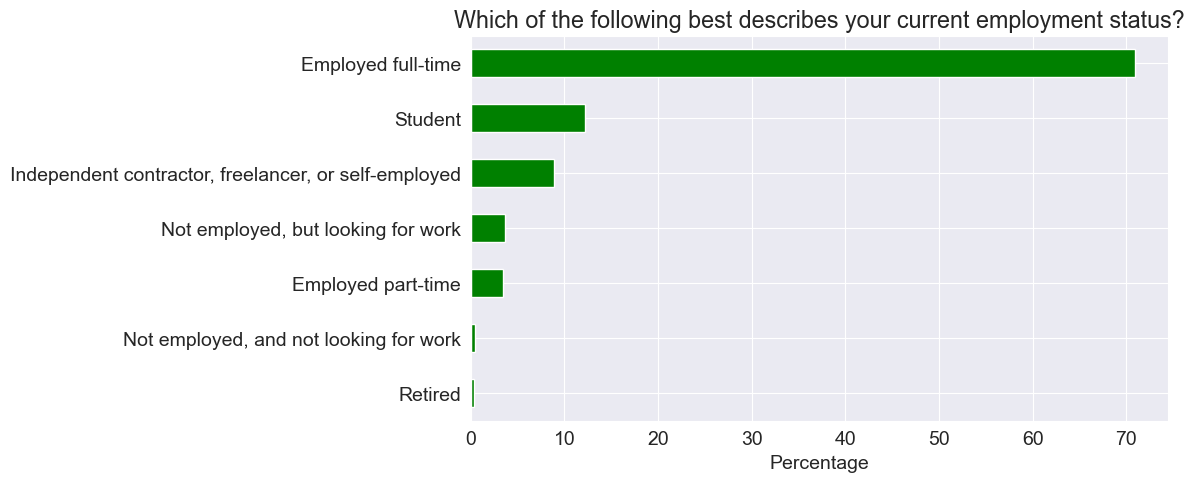

In [49]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

Es scheint, dass knapp 10 % der Befragten in Teilzeit oder als Freiberufler beschäftigt sind.

**Übung**: Fügen Sie eine neue Spalte `EmploymentType` hinzu, die die Werte `Enthusiast` (Student oder nicht angestellt, aber auf der Suche nach Arbeit), `Professional` (vollzeitbeschäftigt, Teilzeit oder freiberuflich tätig) und enthält `Other` (nicht angestellt oder im Ruhestand). Zeigen Sie für jede der folgenden Grafiken einen Vergleich zwischen `Enthusiast` und `Professional`.

Das Feld `DevType` enthält Informationen zu den Rollen, die die Befragten innehaben. Da die Frage mehrere Antworten zulässt, enthält die Spalte Wertelisten, die durch `;` getrennt sind, was die direkte Analyse etwas schwieriger macht.

In [50]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [51]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

Definieren wir eine Hilfsfunktion, die eine Spalte mit Wertelisten (wie `survey_df.DevType`) in einem Data Frame mit einer Spalte für jede mögliche Option umwandelt.

In [52]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [53]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [54]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


`dev_type_df` hat eine Spalte für jede Option, die als Antwort ausgewählt werden kann. Wenn ein Befragter die Option ausgewählt hat, ist der Wert in der Spalte `True`, andernfalls ist er `False`.

Wir können nun die spaltenweisen Summen verwenden, um die häufigsten Rollen zu identifizieren.

In [55]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

Wie zu erwarten ist, enthalten die häufigsten Rollen „Developer“ im Namen.

**Übungen**:

* Können Sie herausfinden, wie viel Prozent der Befragten in Rollen mit Bezug zur Datenwissenschaft arbeiten?
* Welche Rolle hat den höchsten Frauenanteil?

Wir haben nur eine Handvoll der 20 ausgewählten Spalten untersucht. Erkunden und visualisieren Sie die verbleibenden Spalten mithilfe der leeren Zellen unten.

In [ ]:
# Tragen Sie Ihren Code hier ein!

<a id='fragen'></a>

## Fragen stellen und beantworten

Wir haben bereits mehrere Erkenntnisse über die Befragten und die Programmiergemeinschaft im Allgemeinen gewonnen, indem wir einfach einzelne Spalten des Datensatzes untersucht haben. Lassen Sie uns einige spezifische Fragen stellen und versuchen, sie mithilfe von Data Frame-Operationen und interessanten Visualisierungen zu beantworten.

### F: Welche waren die beliebtesten Programmiersprachen im Jahr 2020?

Um dies zu beantworten, können wir die Spalte `LanguageWorkedWith` verwenden. Ähnlich wie bei `DevType` konnten die Befragten hier mehrere Optionen auswählen.

In [56]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [57]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [58]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

Zuerst teilen wir diese Spalte in ein Data Frame auf, der eine Spalte für jede in den Optionen aufgeführte Sprache enthält.

In [59]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [60]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Es scheint, dass insgesamt 25 Sprachen in den Optionen enthalten waren. Fassen wir diese zusammen, um den Prozentsatz der Befragten zu ermitteln, die die einzelnen Sprachen ausgewählt haben.

In [61]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

Wir können diese Informationen mithilfe eines horizontalen Balkendiagramms darstellen.

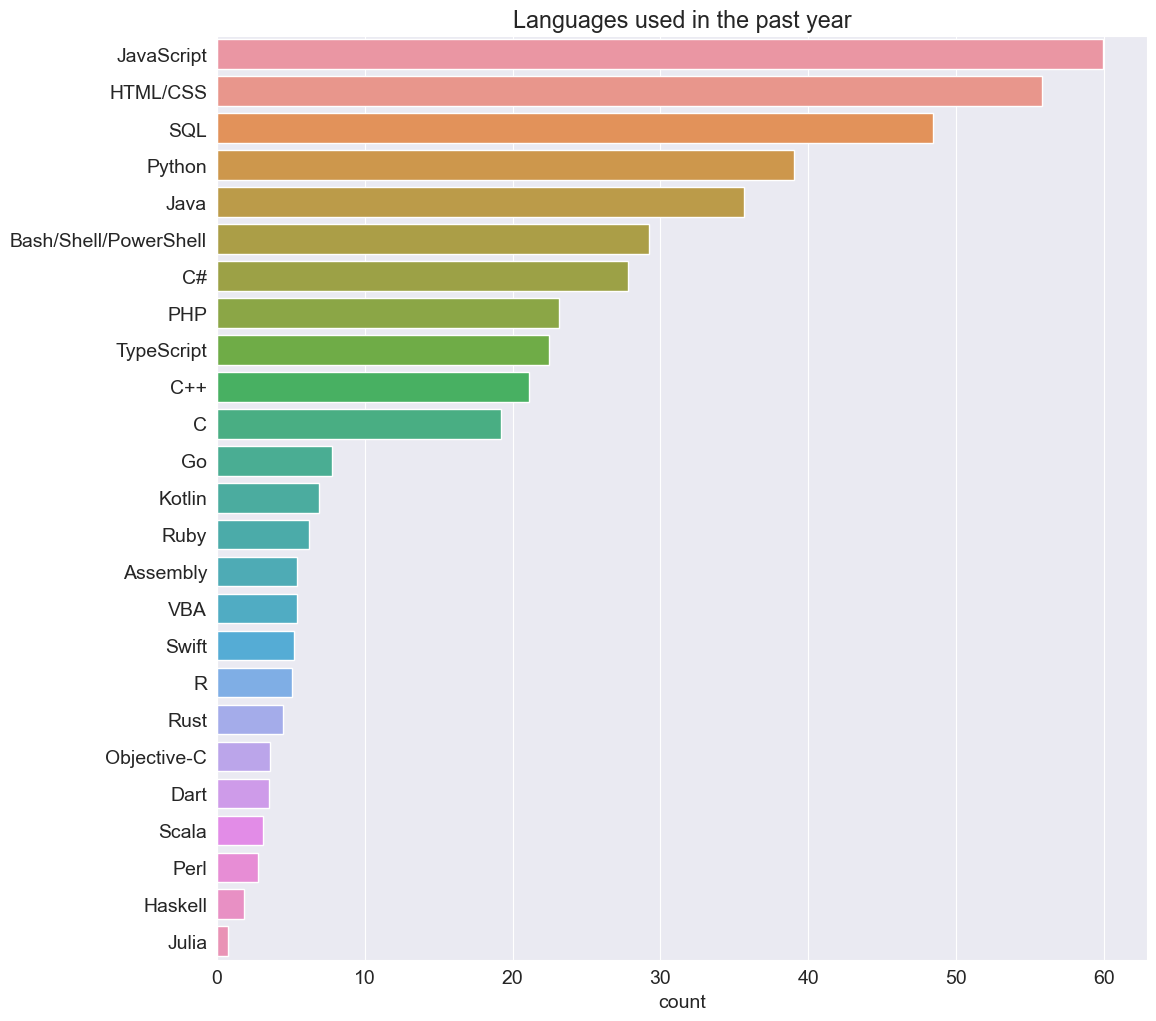

In [62]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Es überrascht vielleicht nicht, dass Javascript und HTML/CSS an der Spitze stehen, da die Webentwicklung heutzutage eine der gefragtesten Fähigkeiten ist und zufälligerweise auch eine der am einfachsten zu erlernenden Fähigkeiten ist. SQL ist für die Arbeit mit relationalen Datenbanken notwendig, daher ist es keine Überraschung, dass die meisten Programmierer regelmäßig mit SQL arbeiten. Für andere Entwicklungsformen scheint Python die beliebteste Wahl zu sein und Java zu verdrängen, das über zwei Jahrzehnte lang der Industriestandard für die Server- und Anwendungsentwicklung war.

**Übungen**:

* Welche Sprachen werden von Studierenden am häufigsten verwendet? Wie schneidet die Liste im Vergleich zu den am häufigsten von professionellen Entwicklern verwendeten Sprachen ab?
* Welches sind die häufigsten Sprachen unter den Befragten, die sich selbst nicht als „Entwickler, Frontend“ bezeichnen?
* Welche Sprachen werden unter den Befragten, die in Bereichen mit Bezug zur Datenwissenschaft arbeiten, am häufigsten gesprochen?
* Welche Sprachen werden am häufigsten von Entwicklern verwendet, die älter als 35 Jahre sind?
* Welche Sprachen werden von Entwicklern in Ihrem Heimatland am häufigsten verwendet?

### F: Welche Sprachen möchten die Menschen im nächsten Jahr am meisten lernen?

Hierzu können wir die Spalte `LanguageDesireNextYear` mit ähnlicher Verarbeitung wie die vorherige verwenden.

In [63]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [64]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

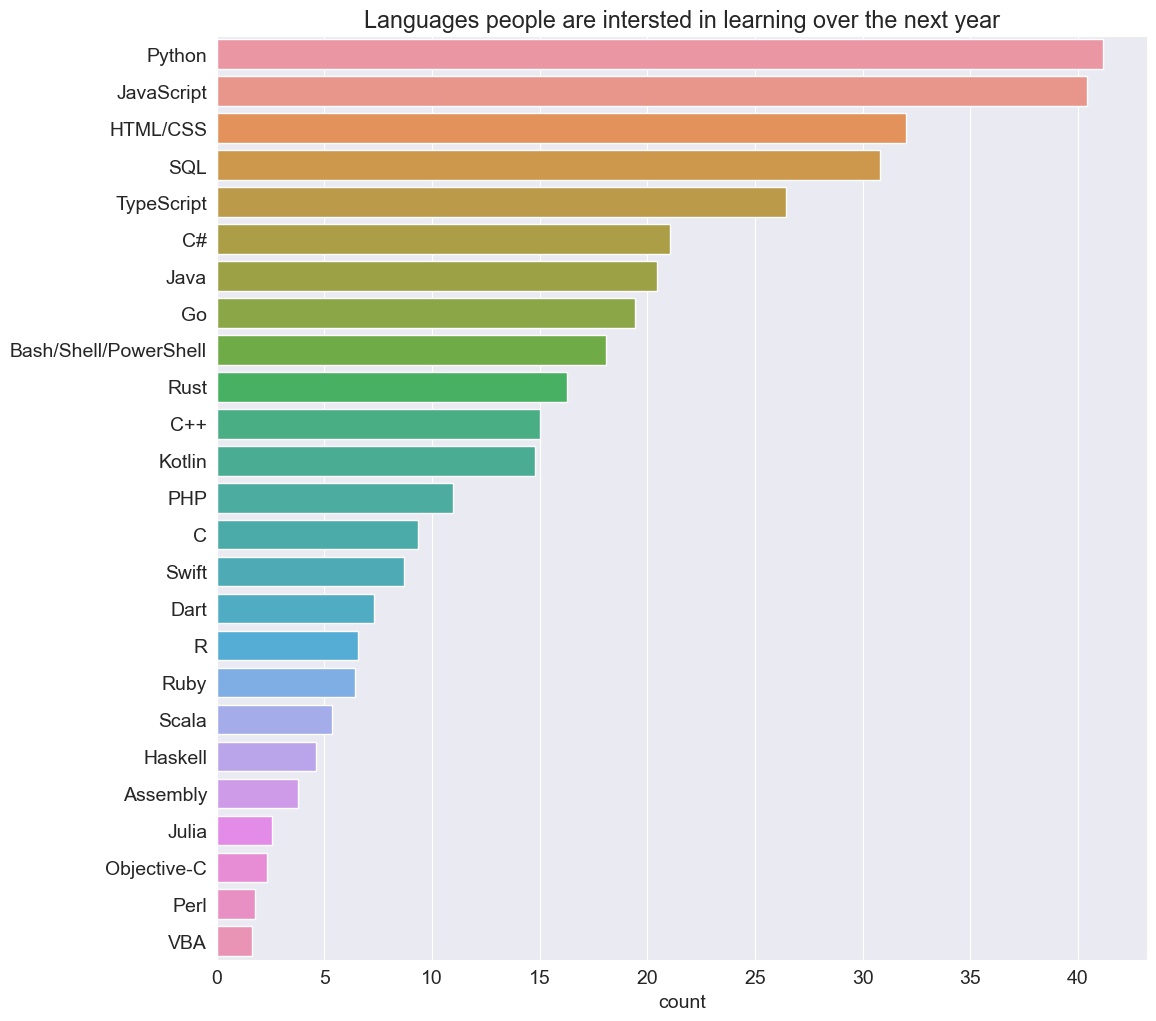

In [65]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Auch hier ist es nicht verwunderlich, dass Python die Sprache ist, die die meisten Menschen lernen möchten – da es sich um eine leicht zu erlernende Allzweck-Programmiersprache handelt, die sich gut für eine Vielzahl von Bereichen eignet: Anwendungsentwicklung, numerische Berechnungen, Datenanalyse, maschinelles Lernen , Big Data, Cloud-Automatisierung, Web Scraping, Scripting usw. usw. Wir verwenden Python für genau diese Analyse, also sind wir in guter Gesellschaft!

**Übungen**: Wiederholen Sie alle Übungen für die vorherige Frage und ersetzen Sie dabei „am häufigsten verwendete Sprachen“ durch „Sprachen, die Menschen gerne lernen/anwenden“.

### F: Welche sind die beliebtesten Sprachen, d. h. ein hoher Prozentsatz der Menschen, die die Sprache verwendet haben, möchten sie im nächsten Jahr weiter lernen und verwenden?

Auch wenn diese Frage auf den ersten Blick schwierig erscheinen mag, ist sie mit Pandas-Array-Operationen wirklich einfach zu lösen. Folgendes können wir tun:

- Erstellen Sie ein neues Data Frame `languages_loved_df`, der nur dann einen `True`-Wert für eine Sprache enthält, wenn die entsprechenden Werte in `languages_worked_df` und `languages_interested_df` beide `True` sind.
- Nehmen Sie die spaltenweise Summe von `languages_loved_df` und dividieren Sie sie durch die spaltenweise Summe von `languages_worked_df`, um den Prozentsatz der Befragten zu erhalten, die die Sprache „lieben“.
- Sortieren Sie die Ergebnisse in absteigender Reihenfolge und zeichnen Sie ein horizontales Balkendiagramm

In [66]:
True & False

False

In [67]:
languages_loved_df = languages_worked_df & languages_interested_df

In [68]:
languages_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

In [70]:
languages_loved_percentages

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

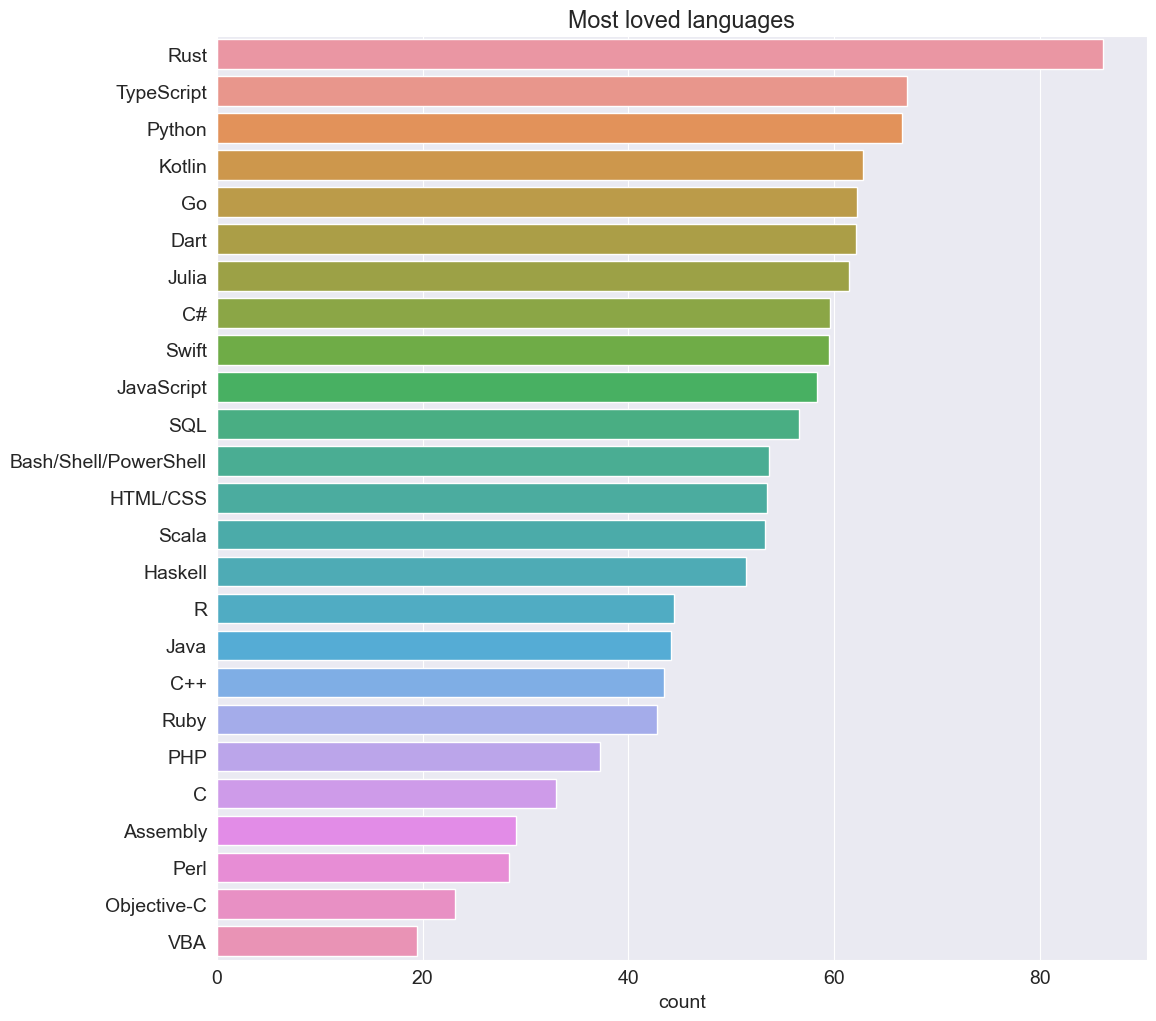

In [71]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

[Rust](https://www.rust-lang.org) ist seit [4 Jahren in Folge](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular/) die beliebteste Sprache auf StackOverflow, gefolgt von TypeScript, das in den letzten Jahren als gute Alternative zu JavaScript für die Webentwicklung an Popularität gewonnen hat.

Python rangiert auf Platz 3, obwohl es bereits eine der am weitesten verbreiteten Sprachen der Welt ist. Dies zeigt auf, dass die Sprache eine solide Grundlage hat, wirklich einfach zu erlernen und zu verwenden ist, ein starkes Ökosystem von Bibliotheken für verschiedene Anwendungsfälle besitzt und eine riesige weltweite Gemeinschaft von Entwicklern hat, die Freude am Umgang mit ihr haben.

**Übungen:** Was sind die _meistgefürchteten Sprachen_, also Sprachen, die die Leute im vergangenen Jahr verwendet haben, aber im nächsten Jahr nicht erlernen oder verwenden wollen. Hinweis: `~languages_interested_df`

### F: In welchen Ländern arbeiten Entwickler am meisten Stunden pro Woche? Berücksichtigen Sie nur Länder mit mehr als 250 Antworten.

Um diese Frage zu beantworten, müssen wir die Data Frame-Methode `groupby` verwenden, um die Zeilen für jedes Land zu aggregieren. Außerdem müssen wir die Ergebnisse filtern, um nur die Länder einzuschließen, die mehr als 250 Befragte haben.

In [72]:
survey_df.groupby('Country')[['WorkWeekHrs', 'Age']].mean()

,WorkWeekHrs,Age
Country,,
Afghanistan,46.500000,23.571429
Albania,43.962963,26.766667
Algeria,36.862069,28.019608
Andorra,42.000000,39.000000
Angola,24.500000,25.500000
...,...,...
"Venezuela, Bolivarian Republic of...",40.125000,29.090909
Viet Nam,41.391667,25.786585
Yemen,40.000000,31.000000


In [73]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [74]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [75]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


Die asiatischen Länder wie Iran, China und Israel haben die höchsten Arbeitszeiten, gefolgt von den Vereinigten Staaten. Allerdings gibt es insgesamt keine allzu großen Unterschiede und die durchschnittliche Arbeitszeit scheint bei etwa 40 Stunden pro Woche zu liegen.

**Übungen:**

* Wie sind die durchschnittlichen Arbeitsstunden auf verschiedenen Kontinenten zu vergleichen? Möglicherweise finden Sie diese Liste von [Ländern auf jedem Kontinent](https://hub.jovian.ml/wp-content/uploads/2020/09/countries.csv) hilfreich.
* Welche Rolle hat die höchste durchschnittliche Anzahl an Arbeitsstunden pro Woche? Welche Rolle hat die niedrigste?
* Wie sind die geleisteten Arbeitsstunden im Vergleich zwischen Freiberuflern und Entwicklern, die Vollzeit arbeiten?

### F: Wie wichtig ist es, jung anzufangen, um eine Karriere im Programmieren aufzubauen?

Lassen Sie uns ein Streudiagramm von `Age` vs. `YearsCodePro` (d. h. Jahre Programmiererfahrung) erstellen, um diese Frage zu beantworten.

In [76]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

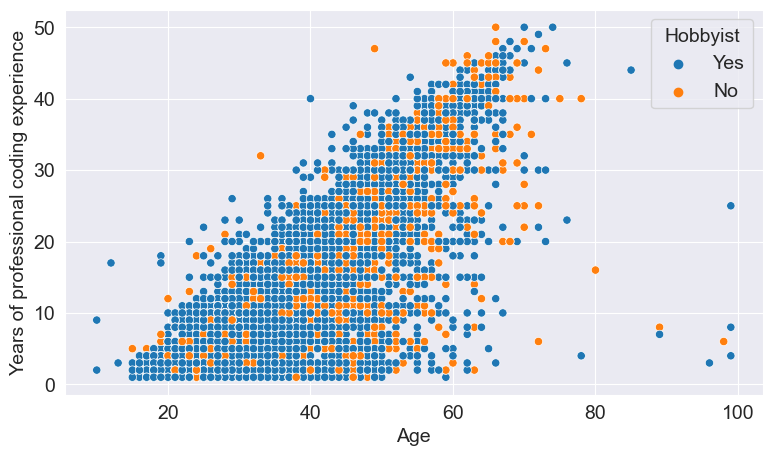

In [77]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

Sie können überall in der Grafik Punkte sehen, was darauf hindeutet, dass Sie **in jedem Alter professionell mit dem Programmieren beginnen können**. Außerdem scheinen viele Menschen, die seit mehreren Jahrzehnten beruflich mit dem Programmieren beschäftigt sind, auch als Hobby Spaß daran haben.

Wir können auch die Verteilung der Spalte `Age1stCode` anzeigen, um zu sehen, wann die Befragten zum ersten Mal versucht haben, zu programmieren.

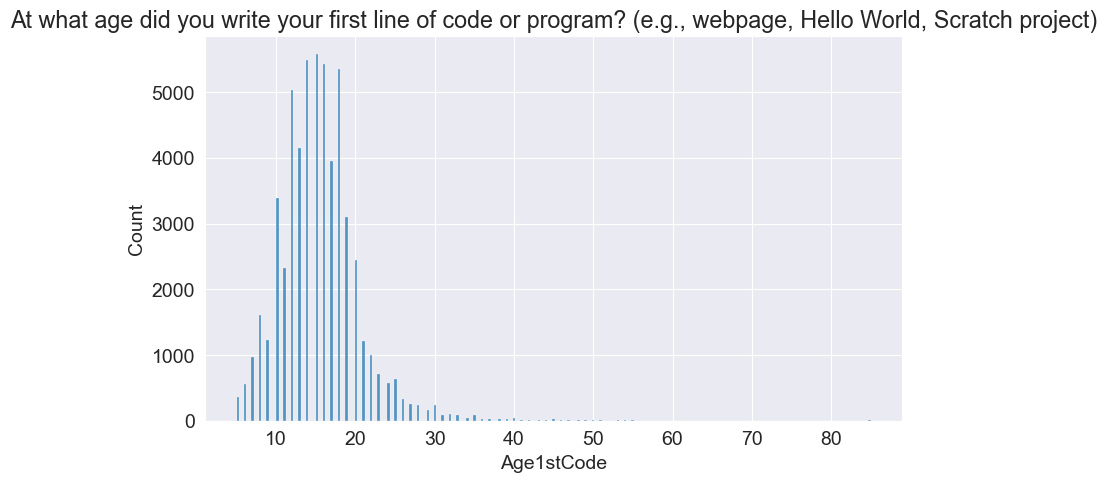

In [78]:
plt.title(schema.Age1stCode)
sns.histplot(survey_df.Age1stCode);

Wie zu erwarten ist, scheinen die meisten Menschen bereits vor ihrem 40. Lebensjahr mit dem Programmieren in Berührung gekommen zu sein, aber es gibt Menschen jeden Alters und jeder Gesellschaftsschicht, die das Programmieren lernen.

**Übungen**:
* Wie verändert Erfahrung Meinungen und Vorlieben? Wiederholen Sie die gesamte Analyse und vergleichen Sie dabei die Antworten von Personen mit mehr als 10 Jahren professioneller Programmiererfahrung mit denen von Personen, die weniger als 10 Jahre professionelle Programmiererfahrung verfügen. Sehen Sie interessante Trends?
* Vergleichen Sie die Jahre professioneller Programmiererfahrung verschiedener Geschlechter.

Benutzen Sie die leeren Zellen unten, um weitere Fragen zu stellen und zu beantworten.

In [ ]:
# Tragen Sie Ihren Code hier ein!

<a id='ergebnisse'></a>

## Schlussfolgerungen und Ergebnisse

Wir haben viele interessante Schlussfolgerungen aus der Umfrage gezogen, hier ist eine Zusammenfassung von einigen davon:

- Basierend auf den demografischen Daten der Umfrageteilnehmer können wir schließen, dass die Umfrage in gewisser Weise repräsentativ für die gesamte Programmiergemeinschaft ist, obwohl sie definitiv weniger Antworten von Programmierern aus nicht-englischsprachigen Ländern und von Frauen & nicht-binären Geschlechtern hat.

- Die Programmiergemeinschaft ist nicht so vielfältig, wie sie sein könnte, und obwohl sich die Dinge verbessern, sollten wir mehr Anstrengungen unternehmen, um Mitglieder von unterrepräsentierten Gemeinschaften zu unterstützen und zu ermutigen - sei es hinsichtlich des Alters, des Landes, der Rasse, des Geschlechts oder sonstiger Aspekte.

- Die meisten Programmierer haben einen Hochschulabschluss, obwohl ein ziemlich großer Prozentsatz im College nicht Informatik als Hauptfach hatte. Daher ist ein Informatikabschluss nicht zwingend notwendig, um das Programmieren zu erlernen oder eine Karriere in der Programmierung aufzubauen.

- Ein bedeutender Prozentsatz der Programmierer arbeitet entweder Teilzeit oder als Freiberufler, und das kann ein großartiger Weg sein, um in das Feld einzusteigen, besonders wenn man gerade erst anfängt.

- Javascript & HTML/CSS sind die am häufigsten verwendeten Programmiersprachen im Jahr 2020, dicht gefolgt von SQL & Python.

- Python ist die Sprache, die die meisten Leute lernen möchten - da es eine leicht zu erlernende allgemeine Programmiersprache ist, die gut für eine Vielzahl von Bereichen geeignet ist.

- Rust und TypeScript sind die "beliebtesten" Sprachen im Jahr 2020, beide haben kleine, aber schnell wachsende Gemeinschaften. Python ist ein enger Dritter, obwohl es bereits eine weit verbreitete Sprache ist.

- Programmierer auf der ganzen Welt scheinen durchschnittlich etwa 40 Stunden pro Woche zu arbeiten, mit leichten Variationen je nach Land.

- Man kann in jedem Alter programmieren lernen und professionell einsteigen, und man hat wahrscheinlich eine lange und erfüllende Karriere, wenn man auch das Programmieren als Hobby genießt.

## Referenzen und zukünftige Arbeit

Mit der Umfrage lässt sich eine Fülle von Informationen entdecken, und wir haben gerade erst an der Oberfläche gekratzt. Hier sind einige Ideen für eine weitere Erkundung:

- Wiederholen Sie die Analyse für verschiedene Altersgruppen und Geschlechter und vergleichen Sie die Ergebnisse.
- Wählen Sie eine andere Gruppe von Spalten (wir haben 20 von 65 gewählt) aus, um andere Aspekte der Daten zu analysieren.
- Bereiten Sie eine Analyse mit Schwerpunkt auf Vielfalt vor und identifizieren Sie Bereiche, in denen unterrepräsentierte Gemeinschaften mit der Mehrheit gleichauf sind (z.B. Bildung) und wo sie es nicht sind (z.B. Gehälter).
- Vergleichen Sie die Ergebnisse dieser Umfrage mit denen der Vorjahre und identifizieren Sie interessante Trends.

Referenzen:

- [Stack Overflow Entwicklerumfrage](https://insights.stackoverflow.com/survey)
- [Pandas Benutzerhandbuch](https://pandas.pydata.org/docs/user_guide/index.html)
- [Matplotlib Benutzerhandbuch](https://matplotlib.org/3.3.1/users/index.html)
- [Seaborn Benutzerhandbuch & Tutorial](https://seaborn.pydata.org/tutorial.html)
- [`opendatasets` Python-Bibliothek](https://github.com/JovianML/opendatasets)